<div style="background-color:orange;text-align:center;vertical-align:middle"><table><tr><td><pre>
<!-- <center><h1><font color='darkorange'>Kodluyoruz & Patika.dev Academy</font></h1></center> -->
<p align="center"><img src="https://i.im.ge/2021/09/11/TQ9Pvp.png" alt="TQ9Pvp.png" width=500></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/02/kodluyoruz_logo_sosyalgirisim.png-->
<p align="center"><img src="https://upload.wikimedia.org/wikipedia/tr/9/9f/Eczac%C4%B1ba%C5%9F%C4%B1_spor_kul%C3%BCb%C3%BC_%28logo%29.jpg" alt="TQmmAq.jpg" width=70></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/03/Frame.png-->
<center><h1><em><font color='darkorange'>110. VitrA Veri Bilimi Bootcamp </font></em></h1></center>
<center><h2><em><font color='darkorange'>September-2021</font></em></h2></center>
<table style="width:35%">
    <tr>
        <td><b>Project:</b></td>
        <td>Vitra - Pharma Sales Prediction </td>
    </tr>
    <tr>
        <td><b>Data Owner:</b></td>
        <td>Sercan Kara</td>
    </tr>
    <tr>
        <td><b>Group Members:</b></td>
        <td>Erkan Çetinyamaç</td>
    </tr>
    <tr>
        <td><b></b></td>
        <td>Yağmur Uzun</td>
    </tr>
    <tr>
        <td><b></b></td>
        <td>Arda Can Baysar</td>
  </tr>
  <tr>
        <td></td>
        <td>Eren Kaya</td>
  </tr>
    <tr>
        <td></td>
        <td>Melike Demirdağ</td>
  </tr>
</table>
</pre></td></tr></table></div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
np.random.seed(2021)

In [ ]:
df = pd.read_excel('DataPharma.xlsx')
from sklearn.utils import shuffle

In [ ]:
df

,Year,Period,Product,Province,Quantity
0,2017,201701,PRODUCT_A,ANKARA,16
1,2017,201701,PRODUCT_A,ANKARA,25
2,2017,201701,PRODUCT_A,ANKARA,56
3,2017,201701,PRODUCT_A,ANKARA,16
4,2017,201701,PRODUCT_A,ADANA,11
...,...,...,...,...,...
48283,2019,201912,PRODUCT_X,ŞANLIURFA,317
48284,2019,201912,PRODUCT_X,TRABZON,171
48285,2019,201912,PRODUCT_X,TUNCELİ,16
48286,2019,201912,PRODUCT_X,VAN,301


In [ ]:
conInt = lambda x : int(x) 
df['Period'] = df['Period'].apply(conInt)
df['Period2'] = df['Period']


In [ ]:
typo = lambda x : 'ISTANBUL' if x == 'İSTANBUL' else x
df['Province'] = df['Province'].apply(typo)


df['Year'] = df['Year'].astype(np.int64)
df['Quantity'] = df['Quantity'].astype(np.int64)
df['Period2'] = df['Period2'].astype(np.int64)


df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')
df['Month'] = df.Period.dt.month

def seasonality(x):
  if x in(12,1,2):
    return "winter"
  elif x in (3,4,5):
    return "spring"
  elif x in(6,7,8):
    return "summer"
  else:
    return "autumn"
df["Season"]=df["Month"].apply(seasonality)

In [ ]:
def region(x):
  if x in ['EDİRNE','KIRKLARELİ','TEKİRDAĞ','ISTANBUL','KOCAELİ','YALOVA','SAKARYA','BİLECİK','BURSA','BALIKESİR','ÇANAKKKALE']:
    return "Marmara"
  elif x in ['AKSARAY','ANKARA','ÇANKIRI','ESKİŞEHİR','KARAMAN','KIRIKKALE','KIRŞEHİR','KONYA','NEVŞEHİR','NİĞDE','SİVAS','YOZGAT','KAYSERİ']:
    return "İc_Anadolu"
  elif x in ['İZMİR','MANİSA','AYDIN','DENİZLİ','KÜTAHYA','AFYON','UŞAK','MUĞLA']:
    return "Ege"
  elif x in ['ADANA','OSMANİYE','ANTALYA','BURDUR','HATAY','ISPARTA','İÇEL','KAHRAMANMARAŞ']:
    return "Akdeniz"
  elif x in ['RİZE','TRABZON','ARTVİN','SİNOP','TOKAT','ÇORUM','AMASYA','SAMSUN','ZONGULDAK','BOLU','DÜZCE','KARABÜK','BARTIN','KASTAMONU','BAYBURT','GİRESUN','GÜMÜŞHANE','ORDU']:
    return "Karadeniz"
  elif x in ['AĞRI','ARDAHAN','BINGOL','BITLIS','ELAZIĞ','ERZİNCAN','ERZURUM','HAKKARİ','IĞDIR','KARS','MALATYA','MUŞ','TUNCELİ','VAN','ŞIRNAK']:
    return "Dogu_Anadolu"
  elif x in ['ADIYAMAN','BATMAN','DİYARBAKIR','GAZİANTEP','KİLİS','MARDIN','SİİRT','ŞANLIURFA']:
    return "Guneydogu_Anadolu"
  else:
    return np.nan

df["Region"]=df["Province"].apply(region)


Is_Metropol = lambda x : 1 if x in ['ANKARA','İZMİR','ISTANBUL','BURSA','ANTALYA','ADANA','İÇEL','AYDIN','SAMSUN','MANİSA'] else 0
df["Metropol"] = df['Province'].apply(Is_Metropol)


df["Product"]=df["Product"].str.split("_",expand=True)[1]

def TotalAmountQuantityDistribution(x):
  if x == 'B':
    return 5
  elif x == "X":
    return 4
  elif x == "A":
    return 3
  elif x == "C":
    return 2
  else:
    return 1
df['Total_Sale_Amount'] = df['Product'].apply(TotalAmountQuantityDistribution)

In [ ]:
productt = df.Product.unique()
provinces= df.Province.unique()

In [ ]:
for prod in productt:
  for provinc in provinces:
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M1']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(1)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M2']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(2)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M3']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(3)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M6']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(6)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M9']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(9)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M12']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(12)

In [ ]:
df.head()

,Year,Period,Product,Province,Quantity,Period2,Month,Season,Region,Metropol,Total_Sale_Amount,Quantity_M1,Quantity_M2,Quantity_M3,Quantity_M6,Quantity_M9,Quantity_M12
0,2017,2017-01-01,A,ANKARA,16,201701,1,winter,İc_Anadolu,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,2017-01-01,A,ANKARA,25,201701,1,winter,İc_Anadolu,1,3,16.0,NaN,NaN,NaN,NaN,NaN
2,2017,2017-01-01,A,ANKARA,56,201701,1,winter,İc_Anadolu,1,3,25.0,16.0,NaN,NaN,NaN,NaN
3,2017,2017-01-01,A,ANKARA,16,201701,1,winter,İc_Anadolu,1,3,56.0,25.0,16.0,NaN,NaN,NaN
4,2017,2017-01-01,A,ADANA,11,201701,1,winter,Akdeniz,1,3,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Time')

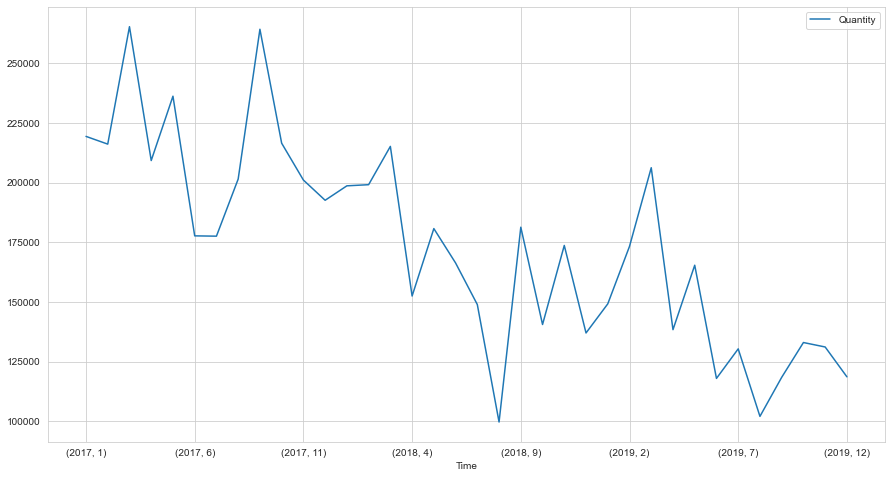

In [ ]:
df.pivot_table(index=["Year","Month"],aggfunc={"Quantity":"sum"}).plot(figsize=(15,8))
plt.xlabel("Time")



# Auto Arima

In [ ]:
import pmdarima as pm

## Product X

In [ ]:
df_test=df.copy()
data= df_test[['Period2','Quantity','Product']]
data

,Period2,Quantity,Product
0,201701,16,A
1,201701,25,A
2,201701,56,A
3,201701,16,A
4,201701,11,A
...,...,...,...
48283,201912,317,X
48284,201912,171,X
48285,201912,16,X
48286,201912,301,X


In [ ]:
data_x= data.loc[data['Product'] == 'X']
data_x= data_x.reset_index(drop=True)
data_x

,Period2,Quantity,Product
0,201701,910,X
1,201701,27,X
2,201701,148,X
3,201701,132,X
4,201701,347,X
...,...,...,...
2915,201912,317,X
2916,201912,171,X
2917,201912,16,X
2918,201912,301,X


In [ ]:
data_x= pd.pivot_table(data_x, values='Quantity', index=['Period2'], aggfunc=np.sum)
data_x= data_x.reset_index(drop=True)
data_x

,Quantity
0,19375
1,18863
2,19959
3,17891
4,19651
5,15839
6,16534
7,15378
8,16552
9,19671


In [ ]:
train=data_x[:30]
test=data_x[30:]

In [ ]:
smodel = pm.auto_arima(train, start_p=0, start_q=0,
                         test='adf',
                         max_p=5, max_q=5, m=12, max_d=5,
                         start_P=0, start_Q=0, max_P=5, max_D=5,
                        seasonal=True, max_Q=5,
                         d=1, D=1, trace=True,
                         error_action='warn',  
                         suppress_warnings=True, 
                         stepwise=False, random_state=2021, n_fits=100)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=314.465, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=305.317, Time=0.12 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,1,5)[12]             : AIC=inf, Time=1.17 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=302.608, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=304.802, Time=0.41 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(1,1,4)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=302.792, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=313.432, Time=0.60 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=304

In [ ]:
prediction=pd.DataFrame(smodel.predict(n_periods=6),index=test.index)
prediction.columns=['Predicted Sales']
prediction

,Predicted Sales
30,18516.628912
31,16528.179584
32,18750.983317
33,20997.353885
34,19981.638959
35,21667.506111


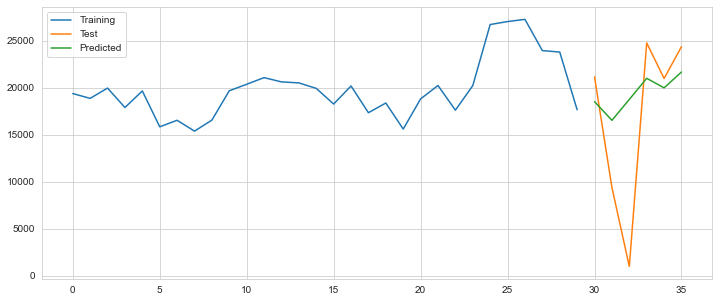

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper left')
plt.show()

#### Confidence Intervallı hali

In [ ]:
# Forecast
n_periods = 6
fc, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train), len(train)+n_periods)

In [ ]:
def forecast_accuracy(forecast, actual):
    from sklearn.metrics import explained_variance_score
    from sklearn.metrics import r2_score
    rsq=r2_score(actual,forecast) #r^2
    exp_var_score=explained_variance_score(actual,forecast)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,'corr':corr,
            'exp_var_score': exp_var_score, 'r^2': rsq
           
           })


#- li metrikler çıkıyor ??

In [ ]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

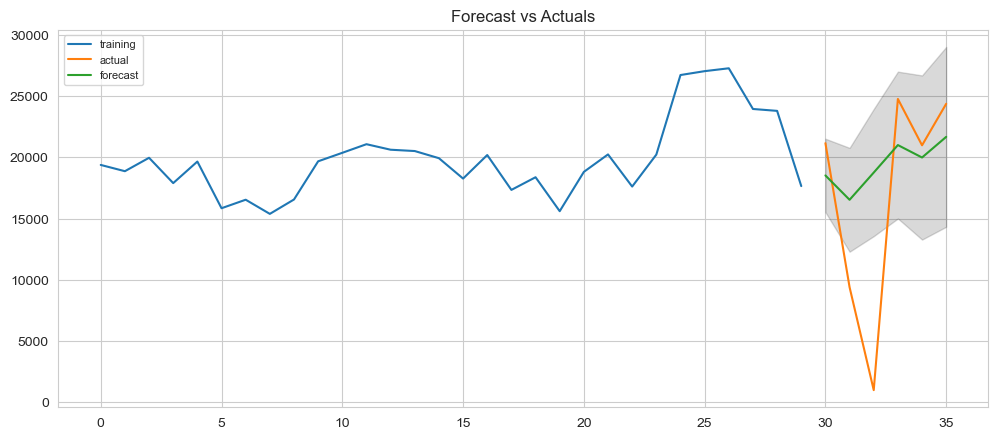

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
x_metrics=forecast_accuracy(prediction['Predicted Sales'], test.Quantity)
x_metrics

{'mape': 3.205270251547756,
 'me': 2468.048461289561,
 'mae': 5833.339172350051,
 'mpe': 3.0603033502331214,
 'rmse': 8123.850123358294,
 'corr': 0.6677342510097932,
 'exp_var_score': 0.22193909910219356,
 'r^2': 0.14282516655044475}

## Product B

In [ ]:
data_b= data.loc[data['Product'] == 'B']
data_b= data_b.reset_index(drop=True)

data_b= pd.pivot_table(data_b, values='Quantity', index=['Period2'], aggfunc=np.sum)
data_b= data_b.reset_index(drop=True)

In [ ]:
train_b=data_b[:30]
test_b=data_b[30:]

smodel_b = pm.auto_arima(train_b, start_p=0, start_q=0,
                         test='adf',
                         max_p=5, max_q=5, m=12, max_d=5,
                         start_P=0, start_Q=0, max_P=5, max_D=5,
                        seasonal=True, max_Q=5,
                         d=1, D=1, trace=True,
                         error_action='warn',  
                         suppress_warnings=True, 
                         stepwise=False, random_state=2021, n_fits=100)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=395.132, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=396.518, Time=0.04 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=398.000, Time=0.10 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=399.999, Time=0.34 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,1,5)[12]             : AIC=403.999, Time=0.57 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=396.519, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=398.118, Time=0.08 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=399.999, Time=0.30 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=401.999, Time=0.43 sec
 ARIMA(0,1,0)(1,1,4)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=398.042, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=400.003, Time=0.09 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=401.999, Time=0.25 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=403.999, Time=0.41 sec
 ARIMA(0,1,0)(3,1,

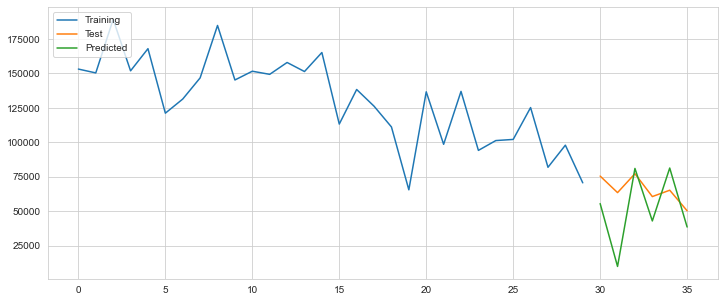

In [ ]:
prediction_b=pd.DataFrame(smodel_b.predict(n_periods=6),index=test_b.index)
prediction_b.columns=['Predicted Sales']

plt.figure(figsize=(12,5))
plt.plot(train_b,label='Training')
plt.plot(test_b,label='Test')
plt.plot(prediction_b,label='Predicted')
plt.legend(loc='upper left')
plt.show()

In [ ]:
b_metrics=forecast_accuracy(prediction_b['Predicted Sales'], test_b.Quantity)
b_metrics

{'mape': 0.32142062234639424,
 'me': -13839.5,
 'mae': 20477.833333333332,
 'mpe': -0.22272180351563486,
 'rmse': 25788.083097301613,
 'corr': 0.5140297085606776,
 'exp_var_score': -4.73643784915368,
 'r^2': -7.0568712012334345}

## Product C

In [ ]:
data_c= data.loc[data['Product'] == 'C']
data_c= data_c.reset_index(drop=True)

In [ ]:
data_c= pd.pivot_table(data_c, values='Quantity', index=['Period2'], aggfunc=np.sum)
data_c= data_c.reset_index(drop=True)

In [ ]:
train_c=data_c[:30]
test_c=data_c[30:]
test_c.shape

(6, 1)

In [ ]:
smodel_c = pm.auto_arima(train_c, start_p=0, start_q=0,
                         test='adf',
                         max_p=5, max_q=5, m=12, max_d=5,
                         start_P=0, start_Q=0, max_P=5, max_D=5,
                        seasonal=True, max_Q=5,
                         d=1, D=1, trace=True,
                         error_action='warn',  
                         suppress_warnings=True, 
                         stepwise=False, random_state=2021, n_fits=100)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=352.879, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=347.330, Time=0.14 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AIC=348.737, Time=0.28 sec
 ARIMA(0,1,0)(0,1,5)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=343.987, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=346.459, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=343.408, Time=0.57 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(1,1,4)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=346.662, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=348.106, Time=0.23 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(3,1,0)[12]             :

Total fit time: 38.556 seconds


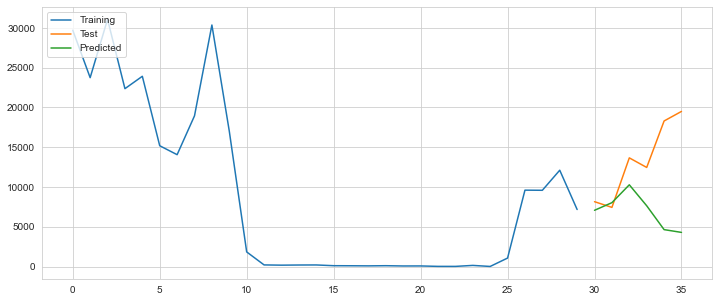

In [ ]:
prediction_c=pd.DataFrame(smodel_c.predict(n_periods=6),index=test_c.index)
prediction_c.columns=['Predicted Sales']

plt.figure(figsize=(12,5))
plt.plot(train_c,label='Training')
plt.plot(test_c,label='Test')
plt.plot(prediction_c,label='Predicted')
plt.legend(loc='upper left')
plt.show()

In [ ]:
c_metrics=forecast_accuracy(prediction_c['Predicted Sales'], test_c.Quantity)
c_metrics

{'mape': 0.3955819906400461,
 'me': -6261.17298447827,
 'mae': 6458.969635642228,
 'mpe': -0.3689856949342561,
 'rmse': 8700.829819183547,
 'corr': -0.6128978053347519,
 'exp_var_score': -0.7492793626024112,
 'r^2': -2.627956299526839}

 ## Product A

In [ ]:
data_a= data.loc[data['Product'] == 'A']
data_a= data_a.reset_index(drop=True)

data_a= pd.pivot_table(data_a, values='Quantity', index=['Period2'], aggfunc=np.sum)
data_a= data_a.reset_index(drop=True)

train_a=data_a[:30]
test_a=data_a[30:]

smodel_a = pm.auto_arima(train_a, start_p=0, start_q=0,
                         test='adf',
                         max_p=5, max_q=5, m=12, max_d=5,
                         start_P=0, start_Q=0, max_P=5, max_D=5,
                        seasonal=True, max_Q=5,
                         d=1, D=1, trace=True,
                         error_action='warn',  
                         suppress_warnings=True, 
                         stepwise=False, random_state=2021, n_fits=100)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=340.715, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=340.727, Time=0.07 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=342.396, Time=0.11 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=344.300, Time=0.48 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AIC=346.287, Time=0.58 sec
 ARIMA(0,1,0)(0,1,5)[12]             : AIC=348.287, Time=0.93 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=342.344, Time=0.06 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=344.294, Time=0.22 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=346.287, Time=0.27 sec
 ARIMA(0,1,0)(1,1,4)[12]             : AIC=348.287, Time=0.53 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=342.447, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=346.294, Time=0.28 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=348.287, Time=0.34 sec
 ARIMA(0,1,0)(3,1,

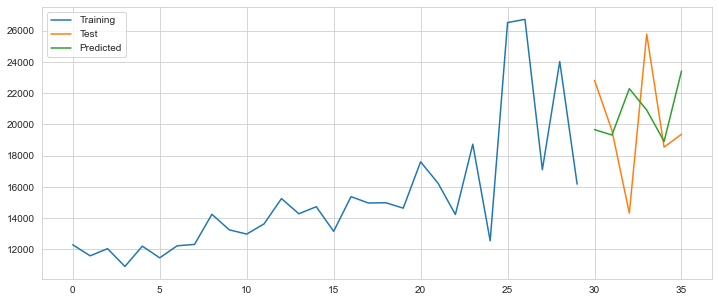

In [ ]:
prediction_a=pd.DataFrame(smodel_a.predict(n_periods=6),index=test_a.index)
prediction_a.columns=['Predicted Sales']

plt.figure(figsize=(12,5))
plt.plot(train_a,label='Training')
plt.plot(test_a,label='Test')
plt.plot(prediction_a,label='Predicted')
plt.legend(loc='upper left')
plt.show()

In [ ]:
a_metrics=forecast_accuracy(prediction_a['Predicted Sales'], test_a.Quantity)
a_metrics

{'mape': 0.18776154936728495,
 'me': 676.0296745570304,
 'mae': 3448.0,
 'mpe': 0.0737282721526606,
 'rmse': 4350.321151464761,
 'corr': -0.26399105205887025,
 'exp_var_score': -0.45356495700664157,
 'r^2': -0.48953488436536596}

## Product V

In [ ]:
data_v= data.loc[data['Product'] == 'V']
data_v= data_v.reset_index(drop=True)

data_v= pd.pivot_table(data_v, values='Quantity', index=['Period2'], aggfunc=np.sum)
data_v= data_v.reset_index(drop=True)

train_v=data_v[:30]
test_v=data_v[30:]

smodel_v = pm.auto_arima(train_v, start_p=0, start_q=0,
                         test='adf',
                         max_p=5, max_q=5, m=12, max_d=5,
                         start_P=0, start_Q=0, max_P=5, max_D=5,
                        seasonal=True, max_Q=5,
                         d=1, D=1, trace=True,
                         error_action='warn',  
                         suppress_warnings=True, 
                         stepwise=False, random_state=2021, n_fits=100)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=337.550, Time=0.24 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=327.515, Time=0.08 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(0,1,5)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=322.769, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=323.871, Time=0.25 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=325.871, Time=0.37 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(1,1,4)[12]             : AIC=inf, Time=1.26 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=323.871, Time=0.21 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=325.871, Time=0.50 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC

In [ ]:
smodel_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   30
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -155.124
Date:                            Sun, 19 Sep 2021   AIC                            322.249
Time:                                    14:59:31   BIC                            327.248
Sample:                                         0   HQIC                           322.746
                                             - 30                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3272      0.224      1.463      0.143      -0.111       0.765
ar.L2         -0.0727      0.234     -0.310      0.757      -0.532       0.387
ar.L3         -0.4501      0.166     -2.715      0.007      -0.775      -0.125
ar.L4          0.4587      0.221      2.073      0.038       0.025       0.892
ar.S.L12      -0.6106      0.088     -6.921      0.000      -0.784      -0.438
sigma2      4.258e+06   6.73e-09   6.32e+14      0.000    4.26e+06    4.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.84   Prob(JB):                         0.51
Heteroskedasticity (H):               2.32   Skew:                            -0.16
Prob(H) (two-sided):                  0.33   Kurtosis:                         1.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.57e+31. Standard errors may be unstable.
"""

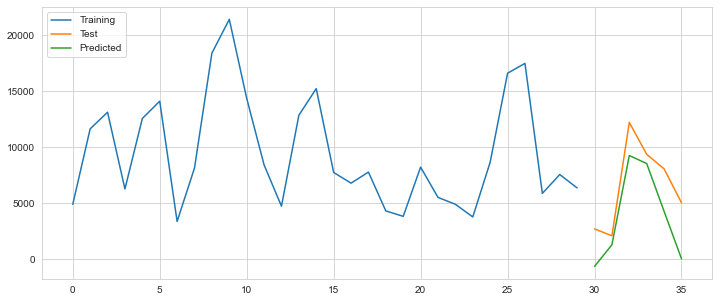

In [ ]:
prediction_v=pd.DataFrame(smodel_v.predict(n_periods=6),index=test_v.index)
prediction_v.columns=['Predicted Sales']

plt.figure(figsize=(12,5))
plt.plot(train_v,label='Training')
plt.plot(test_v,label='Test')
plt.plot(prediction_v,label='Predicted')
plt.legend(loc='upper left')
plt.show()

In [ ]:
v_metrics=forecast_accuracy(prediction_v['Predicted Sales'], test_v.Quantity)
v_metrics

{'mape': 0.5666917164542276,
 'me': -2783.635879007916,
 'mae': 2783.635879007916,
 'mpe': -0.5666917164542276,
 'rmse': 3176.239251923412,
 'corr': 0.9209236506192036,
 'exp_var_score': 0.8223149621652438,
 'r^2': 0.2338988946162064}

In [ ]:
metrics=[x_metrics,b_metrics,c_metrics,a_metrics,v_metrics]
pd.DataFrame.from_records(metrics, index=['Arima_Pred_X', 'Arima_Pred_B', 'Arima_Pred_C',
                                          'Arima_Pred_A','Arima_Pred_V'])

,mape,me,mae,mpe,rmse,corr,exp_var_score,r^2
Arima_Pred_X,3.205270,2468.048461,5833.339172,3.060303,8123.850123,0.667734,0.221939,0.142825
Arima_Pred_B,0.321421,-13839.500000,20477.833333,-0.222722,25788.083097,0.514030,-4.736438,-7.056871
Arima_Pred_C,0.395582,-6261.172984,6458.969636,-0.368986,8700.829819,-0.612898,-0.749279,-2.627956
Arima_Pred_A,0.187762,676.029675,3448.000000,0.073728,4350.321151,-0.263991,-0.453565,-0.489535
Arima_Pred_V,0.566692,-2783.635879,2783.635879,-0.566692,3176.239252,0.920924,0.822315,0.233899


In [ ]:
data_a.describe()

,Quantity
count,36.00000
mean,16020.75000
std,4385.42595
min,10902.00000
25%,12866.75000
50%,14680.50000
75%,17836.50000
max,26722.00000
